# Cyber Data Analytics Assigmnent 2

# Familiarization Task

### Import pakages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

### Loading datasets

In [2]:
#load the files
normal_data = pd.read_csv('training_dataset_01.csv')
attacked_data = pd.read_csv('training_dataset_02.csv')
test_data = pd.read_csv('BATADAL_test_dataset.csv')

#   dataset preprocessing
#   blank space removal (attacked_data)
attacked_data.columns = attacked_data.columns.str.strip()

#   transform the dates to datatime format
attacked_data['DATETIME'] = pd.to_datetime(attacked_data['DATETIME'])
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])
test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'])

#   set the datetime as the index of the dataframe
attacked_data.set_index('DATETIME', inplace=True)
normal_data.set_index('DATETIME', inplace=True)
test_data.set_index('DATETIME', inplace=True)

### Analyzing the data

In [3]:
#   Examine if both datasets contain the same number and type of columns
res = attacked_data.columns == normal_data.columns
if False not in res:
    res = True
else:
    res = False
print("Datasets contain the same number and type of columns: ", res)

#   Number of signals (columns) and their names
print("We have %s columns:  " %len(attacked_data.columns))

#   There is one column for the date and one for the label
print("From them %d are signals:    " %(len(attacked_data.columns)-2))

#   Drop the label column (as it does not represent any signal)
normal_data_heatmap = normal_data.drop(['ATT_FLAG'], axis=1)
attacked_data_heatmap = attacked_data.drop(['ATT_FLAG'], axis=1)
# normal_data_heatmap = normal_data
# attacked_data_heatmap = attacked_data

Datasets contain the same number and type of columns:  True
We have 44 columns:  
From them 42 are signals:    


In [4]:
#   The types of singals
print("Types of signals:    ")
for i in attacked_data_heatmap:
    print(i)

Types of signals:    
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


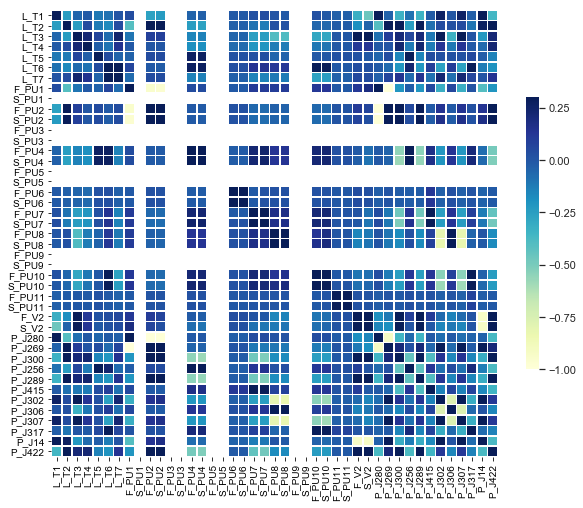

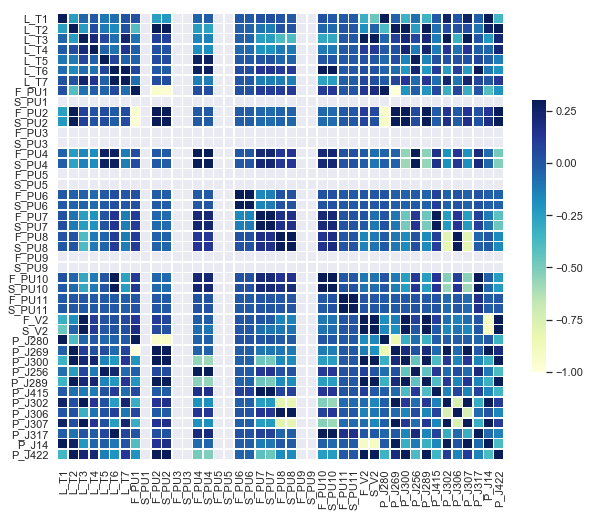

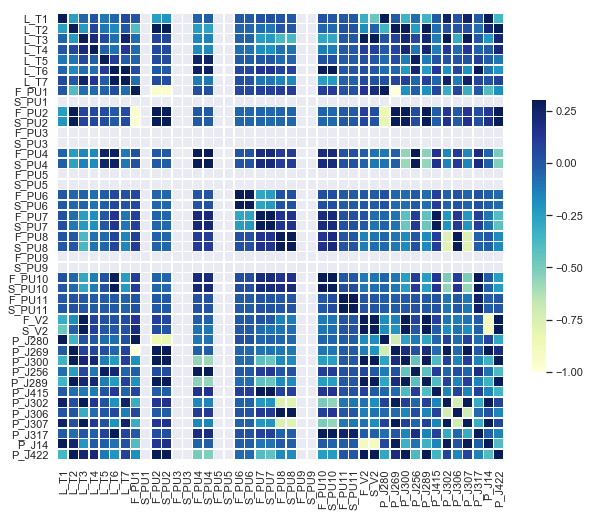

In [5]:
#   Show correlation of signals
frames_normal_normal = [normal_data_heatmap, normal_data_heatmap]
frames_attacked_attacked = [attacked_data_heatmap, attacked_data_heatmap]
frames_normal_attacked = [normal_data_heatmap, attacked_data_heatmap]

combined_n_n = pd.concat(frames_normal_normal)
combined_n_a = pd.concat(frames_normal_attacked)
combined_a_a = pd.concat(frames_attacked_attacked)

corr_n_n = combined_n_n.corr()
corr_n_a = combined_n_a.corr()
corr_a_a = combined_a_a.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr_n_n, linewidth=0.5, cmap="YlGnBu", vmax=.3, square=True,
            xticklabels=corr_n_n.columns.values, yticklabels=corr_n_n.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr_n_a, linewidth=0.5, cmap="YlGnBu", vmax=.3, square=True,
            xticklabels=corr_n_a.columns.values, yticklabels=corr_n_a.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr_a_a, linewidth=0.5,  cmap="YlGnBu", vmax=.3, square=True,
            xticklabels=corr_a_a.columns.values, yticklabels=corr_a_a.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

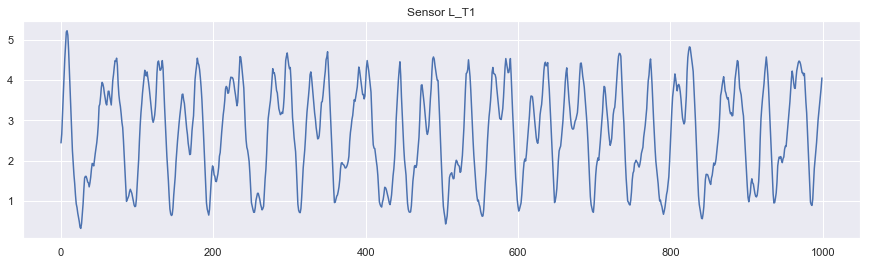

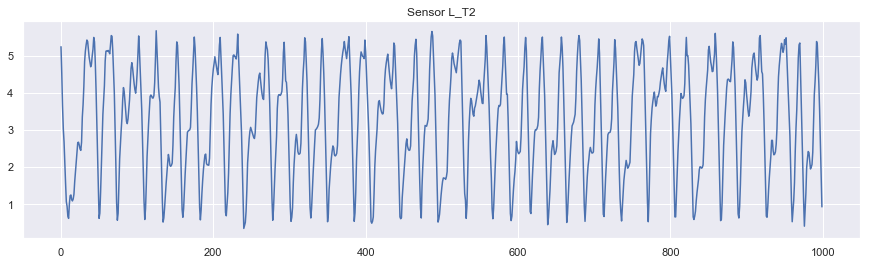

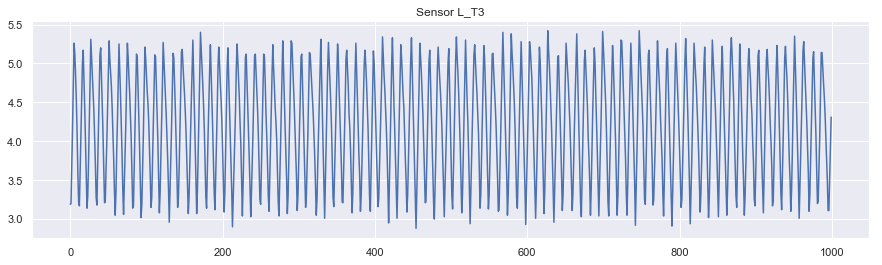

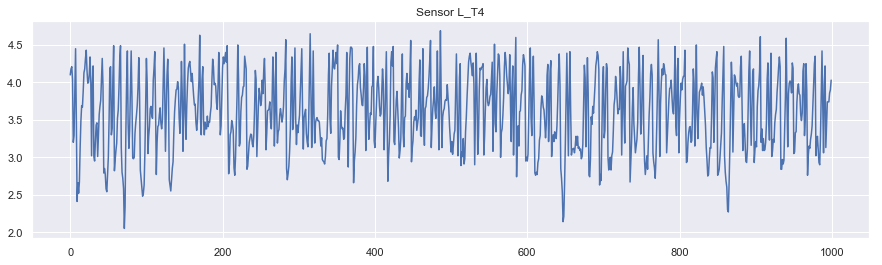

In [6]:
signal_names = normal_data.columns

#visualize some of the signals
attack1=attacked_data[signal_names[0]]
plt.figure(figsize=(15,4))
plt.plot(np.asarray(attack1[0:1000]))
plt.title('Sensor %s' %signal_names[0])
plt.show()


attack2=attacked_data[signal_names[1]]
plt.figure(figsize=(15,4))
plt.plot(np.asarray(attack2[0:1000]))
plt.title('Sensor %s' %signal_names[1])
plt.show()

attack3=attacked_data[signal_names[2]]
plt.figure(figsize=(15,4))
plt.plot(np.asarray(attack3[0:1000]))
plt.title('Sensor %s' %signal_names[2])
plt.show()


attack4=attacked_data[signal_names[3]]
plt.figure(figsize=(15,4))
plt.plot(np.asarray(attack4[0:1000]))
plt.title('Sensor %s' %signal_names[3])
plt.show()



/Users/achilleasvlogiaris/.local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


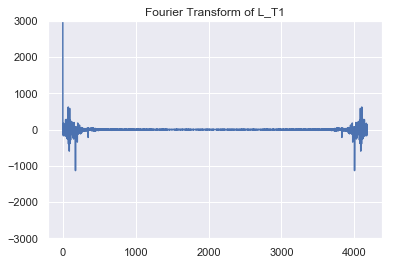

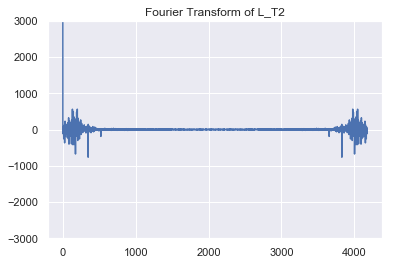

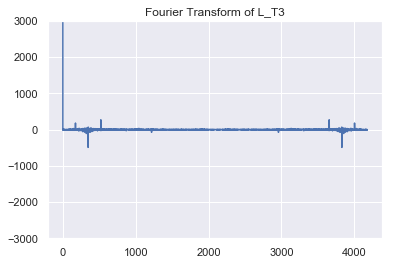

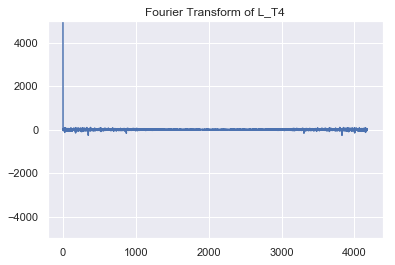

In [7]:
#investigate if the signals have cyclic behavior
#we will use fft for that purpose
plt.plot(np.fft.fft(attacked_data[signal_names[0]]))
plt.ylim([-3000, 3000])
plt.title('Fourier Transform of %s' %signal_names[0])
plt.show()

plt.plot(np.fft.fft(attacked_data[signal_names[1]]))
plt.title('Fourier Transform of %s' %signal_names[1])
plt.ylim([-3000, 3000])
plt.show()

plt.plot(np.fft.fft(attacked_data[signal_names[2]]))
plt.title('Fourier Transform of %s' %signal_names[2])
plt.ylim([-3000, 3000])
plt.show()

plt.plot(np.fft.fft(attacked_data[signal_names[3]]))
plt.ylim([-5000, 5000])
plt.title('Fourier Transform of %s' %signal_names[3])
plt.show()




### ARMA Prediction Model

### Import pakages

In [1]:
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
from pandas import DataFrame
import sys
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import warnings
import matplotlib.pyplot as plt
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Ploting function

In [2]:
def ploting(train):
    # autocorelation plot
    plot_acf(train, lags=50)
    # partial autocorelation plot
    plot_pacf(train, lags=50)
    plt.xlabel('lags')
    plt.show()

### Function that finds the correct order

In [3]:
def find_order (data, terms):
    if terms == "AR":
        lag = pacf(data, nlags=20, method='ols')
    elif terms =="MA":
        lag = acf(data, nlags=20)
    thres = 1.96/np.sqrt(len(data))
    for i,val in enumerate(lag):
        if val<thres:
            break
    return (i-1)

### Function that finds the correct order more accuratly by using the aic criterion

In [4]:
def aic_estimation(ar, ma, train):
    ars = list(range(ar + 1))
    mas = list(range(ma + 1))
    bestmodels =[]
    aics=[]
    for ar in ars:
        for ma in mas:
            try:
                # fit the model with this combination of parameters
                model_fit = ARMA(train, (ar, ma)).fit()
                aics.append(model_fit.aic)
            except:
                aics.append(np.nan)  # ignore error :The computed initial MA coefficients are not invertible
                pass

        # make grid search faster - move on to next signal if the improvements in AIC are not significant with higher ar order
        if ar > 1:
            prev_order = min(aics[-2 * len(mas):-len(mas)])
            cur_order = min(aics[-len(mas):])

            if (prev_order - cur_order < 0 or cur_order > 1.05 * prev_order):
                break
    keys = [str(ar) + "," + str(ma) for ar in ars for ma in mas]
    d = dict(zip(keys, aics))
    minaic = min(d, key=d.get)
    bestmodels.append(minaic)
    return bestmodels

### ARMA prediction function

In [6]:
def ARMA_per_singal(number_of_signal, signal_names, normal_data, signal_size):
    #   Specifying the train and the test set
    train = normal_data[signal_names[number_of_signal]]

    # Call the ploting function for autocorrelation and partial autocorrelation plots
#     ploting(train)

    # Define a rough estimation of the ar and ma parameters
    ar = find_order(train, "AR")
    ma = find_order(train, "MA")

    # Make a more accurate estimation by making a grid search with the aic estimation
    estimation = aic_estimation(ar, ma, train)

    params = [par.split(',') for par in estimation]
    ar = int(params[0][0])
    ma = int(params[0][1])
    
    #   fit model
    train_1 = train[0:round(signal_size/5)]
    train_2 = train[round(signal_size/5):signal_size]
    model = ARMA(train_1, order=(ar, ma))
    model_fit = model.fit(disp=0)
#     print(model_fit.summary())

    #   plot residual errors
#     residuals = DataFrame(model_fit.resid)
#     residuals.plot()
    # plt.show()
    # residuals.plot(kind='kde')
    # plt.show()
#     print(residuals.describe())

    train_2 = train_2.values

    history = [x for x in train]
    predictions = list()
    residuals_all = list()
    for t in range(len(train_2)):
        model = ARMA(history, order=(ar, ma))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0][0]
        predictions.append(yhat)
        obs = train_2[t]
        history.append(obs)

        # print(abs(yhat - obs))
        residuals_all.append(abs(yhat - obs))
#         print('predicted=%f, expected=%f' % (yhat, obs))
#         print("Iteration ", t, "out of ", len(train_2))
    error = mean_squared_error(train_2, predictions)
    print('Test MSE: %.3f' % error)
    # plot

#     >>>Make Plots<<<<
    length = list(range(0, len(predictions)))
    plt.figure(figsize=(15,4))
    plt.plot(length, train_2[0:signal_size])
    plt.plot(length, predictions[0:signal_size])
    plt.show()


### Loading datasets

In [7]:
#   load the files
normal_data = pd.read_csv('training_dataset_01.csv')

#   transform the dates to datatime format
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])

#   set the datetime as the index of the dataframe
normal_data.set_index('DATETIME', inplace=True)

signal_names = normal_data.columns

# Choose a signal
number_of_signal = 2



### Run the ARMA 

Test MSE: 0.059


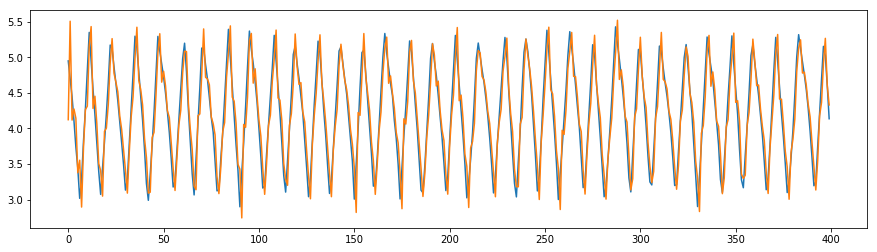

In [9]:
# Call the function in order to make the predictions
# Usually takes some minutes to run
# We train the model for 100 hours and then we predict the next value for 300 hours
# The prediction seems quite good
ARMA_per_singal(number_of_signal, signal_names, normal_data, 500)

# ARMA Task

### Import packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import numpy as np
import statsmodels.api as sm


from pandas import DataFrame
import sys
from sklearn.metrics import mean_squared_error
import warnings
import copy
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Define threshold value with SARIMAX model by using the first and the second train set

In [11]:
def SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data):
    #   Specifying the train and the test set
    train = normal_data[signal_names[number_of_signal]]
    test = attacked_data[signal_names[number_of_signal]]

    # Call the ploting function for autocorrelation and partial autocorrelation plots
    # ploting(train)

    # Define a rough estimation of the ar and ma parameters
    ar = find_order(train, "AR")
    ma = find_order(train, "MA")

    # Make a more accurate estimation by making a grid search with the aic estimation
    estimation = aic_estimation(ar, ma, train)

    params = [par.split(',') for par in estimation]
    ar = int(params[0][0])
    ma = int(params[0][1])

#     >>>Make Plots<<<<
    #   plot residual errors
    # residuals = DataFrame(model_fit.resid)
    # residuals.plot()
    # plt.show()
    # residuals.plot(kind='kde')
    # plt.show()
    # print(residuals.describe())


    train = train.values
    test = test.values

    history = [x for x in train]
    predictions = list()
    residuals_all = list()
    
    # using a small part of the train_2 to avoid the gap between the datasets
    train_2 = test[0:20]
    new_train = np.concatenate((train, train_2), axis=0)
    train = new_train
    model = sm.tsa.SARIMAX(train, order=(ar, 0, ma))
    param = [ar, 0, ma]
    spar = [0] * (int(param[0]) + int(param[1]) + int(param[2]) + 1)
    spar[-1] = 1
    model_fit = model.fit(start_params=spar)


    for t in range(len(test)):

        model_v = sm.tsa.SARIMAX(history,  order=(int(param[0]), int(param[1]), int(param[2])))
        
        # using the parameters from the train set 1 without updating them
        # we reduce the error(anomaly) propagation
        # without updating the parameters the algorithms runs faster
        model_fit_2 = model_v.smooth(model_fit.params)
        output = model_fit_2.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuals_all.append(abs(yhat - obs))
#         print("Iteration ", t, "out of ", len(test))
#         print('predicted=%f, expected=%f' % (yhat, obs))

    length = list(range(0, len(predictions)))

#     >>>Make Plots<<<<
#     plt.plot(length, test)
#     plt.plot(length, predictions)
#     plt.show()

    # We check the largest and the smalles residual when there is anomaly
    # We choose the smallest residual as threshold

    true_labels = attacked_data["ATT_FLAG"].values

    counts = 0
    attacked_hours = list()
    for i in true_labels:
        if i == 1:
            attacked_hours.append(counts)
        counts += 1

    attacked_residuals = list()
    for i in attacked_hours:
        attacked_residuals.append(residuals_all[i])

    minimium_attacked_residual = max(attacked_residuals)
#     print(minimium_attacked_residual)

    count = 0
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in residuals_all:
        if i >= minimium_attacked_residual and true_labels[count] == 1:
            TP += 1
        elif i >= minimium_attacked_residual and true_labels[count] != 1:
            FP += 1
        elif i < minimium_attacked_residual and true_labels[count] == 1:
            FN += 1
        elif i < minimium_attacked_residual and true_labels[count] != 1:
            TN += 1
        count += 1

    return minimium_attacked_residual




### Anomaly Detection on test set

In [12]:
def Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, true_labels):
    #   Specifying the train and the test set
    train = normal_data[signal_names[number_of_signal]]
    test = test_data[signal_names[number_of_signal]]

    # Call the ploting function for autocorrelation and partial autocorrelation plots
    # ploting(train)

    # Define a rough estimation of the ar and ma parameters
    ar = find_order(train, "AR")
    ma = find_order(train, "MA")

    # Make a more accurate estimation by making a grid search with the aic estimation
    estimation = aic_estimation(ar, ma, train)

    params = [par.split(',') for par in estimation]
    ar = int(params[0][0])
    ma = int(params[0][1])

    train = train.values
    test = test.values

    history = [x for x in train]
    predictions = list()
    residuals_all = list()
    
    # using a small part of the train_2 to avoid the gap between the datasets
    train_2 = test[0:20]
    new_train = np.concatenate((train, train_2), axis=0)
    train = new_train
    model = sm.tsa.SARIMAX(train, order=(ar, 0, ma))
    param = [ar, 0, ma]
    spar = [0] * (int(param[0]) + int(param[1]) + int(param[2]) + 1)
    spar[-1] = 1
    model_fit = model.fit(start_params=spar)


    for t in range(len(test)):

        model_v = sm.tsa.SARIMAX(history,  order=(int(param[0]), int(param[1]), int(param[2])))
        
        # using the parameters from the train set 1 without updating them
        # we reduce the error(anomaly) propagation
        # without updating the parameters the algorithms runs faster
        model_fit_2 = model_v.smooth(model_fit.params)
        output = model_fit_2.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuals_all.append(abs(yhat - obs))
#         print("Iteration ", t, "out of ", len(test))
#         print('predicted=%f, expected=%f' % (yhat, obs))

    length = list(range(0, len(predictions)))

#     >>>Make Plots<<<<
    plt.figure(figsize=(15,4))
    plt.plot(length, test)
    plt.plot(length, predictions)
    plt.show()

    count = 0
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in residuals_all:
        if i >= threshold and true_labels[count] == 1:
            TP += 1
        elif i >= threshold and true_labels[count] != 1:
            FP += 1
        elif i < threshold and true_labels[count] == 1:
            FN += 1
        elif i < threshold and true_labels[count] != 1:
            TN += 1
        count += 1
        
    print("Training True Positives:  ", TP)
    print("Training False Positives:  ", FP)
    print("Training False Negatives:  ", FN)
    print("Training True Negatives:  ", TN)

    return TP, FP, FN, TN


### Loading test set

In [ ]:
#   load the test set
test_data = pd.read_csv('BATADAL_test_dataset.csv')
normal_data = pd.read_csv('training_dataset_01.csv')
attacked_data = pd.read_csv('training_dataset_02.csv')

#   dataset preprocessing
#   blank space removal (attacked_data)
attacked_data.columns = attacked_data.columns.str.strip()

#   transform the dates to datatime format
test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'])
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])
attacked_data['DATETIME'] = pd.to_datetime(attacked_data['DATETIME'])

#   set the datetime as the index of the dataframe
test_data.set_index('DATETIME', inplace=True)
normal_data.set_index('DATETIME', inplace=True)
attacked_data.set_index('DATETIME', inplace=True)

signal_names = normal_data.columns

### Consctructing labels

In [ ]:
number_of_signal = 0
test = test_data[signal_names[number_of_signal]]
labels = np.ones(len(test.values))
labels = -1*labels
labels[297:368] = 1
labels[632:698] = 1
labels[867:899] = 1
labels[937:969] = 1
labels[1229:1330] = 1
labels[1574:1655] = 1
labels[1940:1971] = 1


### Predicting Attackes by looking on signal 0

In [ ]:
number_of_singal = 0
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 1

In [ ]:
number_of_singal = 1
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 2

In [ ]:
number_of_singal = 2
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 3

In [ ]:
number_of_singal = 3
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 4

In [ ]:
number_of_singal = 4
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

# PCA task

### Import packages and loading datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler


#   load the files
normal_data = pd.read_csv('training_dataset_01.csv')
test_data = pd.read_csv('BATADAL_test_dataset.csv')

#   dataset preprocessing
#   blank space removal (attacked_data)
normal_data.columns = normal_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()


#   transform the dates to datatime format
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])
test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'])

#   set the datetime as the index of the dataframe
normal_data.set_index('DATETIME', inplace=True)
test_data.set_index('DATETIME', inplace=True)

#   Remove labels
del normal_data['ATT_FLAG']

#   Remove the actuators
normal_data = normal_data.select_dtypes(include=['float64'])
test_data = test_data.select_dtypes(include=['float64'])

# Labeling the test set
signal_names = normal_data.columns
number_of_signal = 0
test = test_data[signal_names[number_of_signal]]
labels = np.ones(len(test.values))
labels = -1*labels
labels[297:368] = 1
labels[632:698] = 1
labels[867:899] = 1
labels[937:969] = 1
labels[1229:1330] = 1
labels[1574:1655] = 1
labels[1940:1971] = 1
label_test = labels

### Estimate the number of eigenvalues for PCA

In [2]:
def optimal_components(eigVals,percentage):
    sortArray = np.sort(eigVals)
    sortArray = sortArray[-1::-1]
    arraySum = sum(sortArray)
    tmpSum = 0
    num = 0
    for i in sortArray:
        tmpSum += i
        num += 1
        if tmpSum >= arraySum*percentage:
            return num, sortArray

### First PCA to remove abnormalities

Number of principle component: 28
(8761, 28)


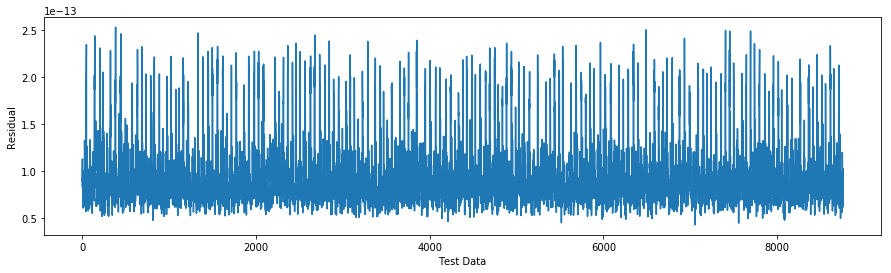

In [3]:

# num = optimal_components(pca.explained_variance_, 0.99)
# print(num)
num = 6
print('Number of principle component:', normal_data.shape[1])
pca = PCA(n_components=normal_data.shape[1])
pca.fit(normal_data)
residuals = normal_data - pca.inverse_transform(pca.transform(normal_data))
res_norm = np.sqrt(np.square(residuals).sum(axis=1))
print(residuals.shape)
# figure, ax = plt.subplots()
plt.figure(figsize=(15,4))
plt.xlabel('Test Data')
plt.ylabel('Residual')
plt.plot(res_norm.values)
plt.show()

mean = np.mean(res_norm)
std = np.std(res_norm)
threshold = mean+std
abnormalities = np.where(res_norm>threshold)[0]
normal_data_droped = normal_data.drop(normal_data.index[abnormalities])

### Visualize the dataset without the abnormalities

Number of principle component: 28
(7855, 28)


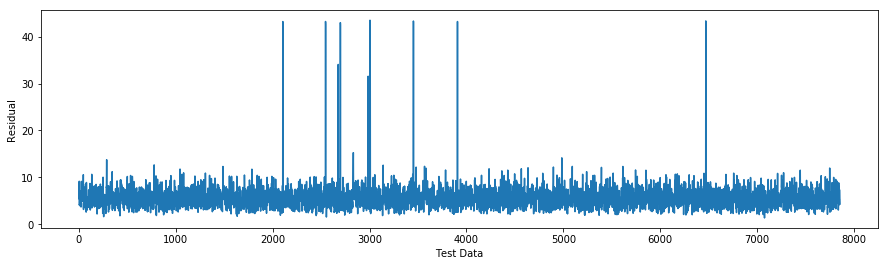

In [4]:

num = 6
# num = optimal_components(pca.explained_variance_, 0.99)
print('Number of principle component:', normal_data.shape[1])
pca = PCA(n_components=num)
pca.fit(normal_data_droped)
residuals_droped = normal_data_droped - pca.inverse_transform(pca.transform(normal_data_droped))
res_norm_droped = np.sqrt(np.square(residuals_droped).sum(axis=1))

print(residuals_droped.shape)
# figure, ax = plt.subplots()
plt.figure(figsize=(15,4))
plt.xlabel('Test Data')
plt.ylabel('Residual')
plt.plot(res_norm_droped.values)
plt.show()

### Visualize the normalized dataset

(7855, 28)


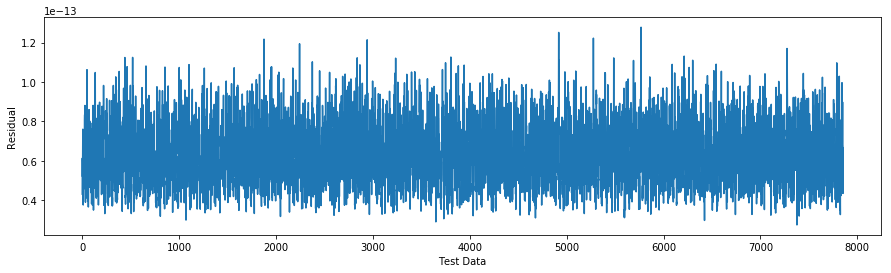

In [5]:
#normalize the cleaned data
normalize = StandardScaler()
# normalized_train = normalize.fit_transform(normal_data_droped)
normalized_train = normal_data_droped.values
#conduct PCA to the cleaned data in order to tune the parameters
pca = PCA(n_components=normal_data.shape[1])
pca.fit(normalized_train)
residual_normalized = normalized_train - pca.inverse_transform(pca.transform(normalized_train))

res_normalized = np.sqrt(np.square(residual_normalized).sum(axis=1))

print(residuals_droped.shape)
# figure, ax = plt.subplots()
plt.figure(figsize=(15,4))
plt.xlabel('Test Data')
plt.ylabel('Residual')
plt.plot(res_normalized)
plt.show()

### Variance and cummulative Variance plots

In [6]:
pca = PCA(n_components=normalized_train.shape[1])
normalized_train_transformed = pca.fit_transform(normalized_train)

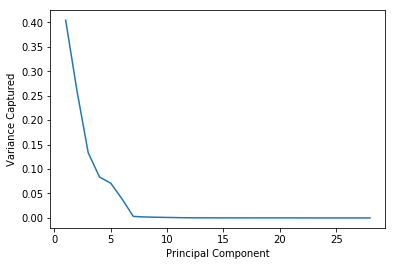

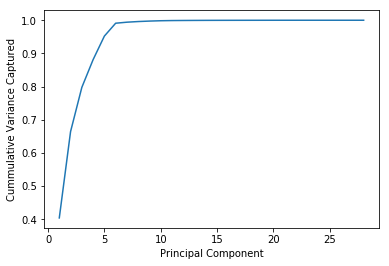

In [7]:
#   Variance Captured plot
x_axis = np.arange(1, normalized_train_transformed.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)
plt.show()

#   Cummulative Variance Captured plot
cummulative_variance=pca.explained_variance_ratio_.cumsum()
x_axis = np.arange(1, normalized_train_transformed.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Cummulative Variance Captured')
plt.plot(x_axis, cummulative_variance)
plt.show()

In [8]:


#how many components explain the 99% of the variance
[num, sortArray] = optimal_components(pca.explained_variance_, 0.95)
print('Number of principle component:', num)




#calculate the threshold, according to the paper "Diagnosing Network-Wide Traffic Anomalies"
sorted_eigen = np.sort(pca.explained_variance_)
sorted_eigen = sorted_eigen[-1::-1]
# print(sorted_eigen)
lambda1 = sorted_eigen
lambda2 = np.power(sorted_eigen,2)
lambda3 = np.power(sorted_eigen, 3)

fi1 = sum(lambda1[num:])
fi2 = sum(lambda2[num:])
fi3 = sum(lambda3[num:])
h0 = 1-2.0*fi1*fi3 / (3*(fi2**2))
Ca = 0.01
threshold = fi1 * np.power(1.0 * Ca * np.sqrt(2* fi2 * (h0 ** 2)) / fi1
                           + 1 + 1.0 * fi2 * h0 * (h0-1) / (fi1 ** 2), 1.0 / h0)

print("The estimated threshold is:  ", threshold)

Number of principle component: 5
The estimated threshold is:   111.36434842063879


(7855, 28)


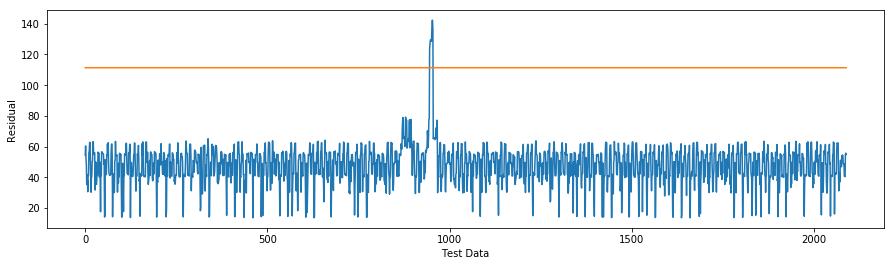

(7855, 28)


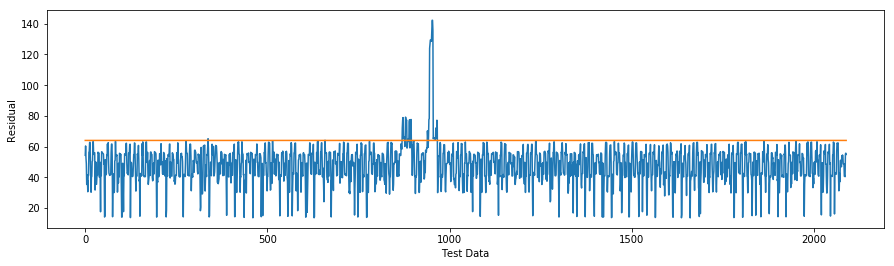

In [11]:
# normalize the test data
# normalized_test = normalize.fit_transform(test_data)
normalized_test = test_data.values
# conduct PCA to the cleaned data in order to tune the parameters
pca = PCA(n_components=num)
# We fit the pca to the first cleaned training dataset
pca.fit(normalized_train)
residual_normalized = normalized_test - pca.inverse_transform(pca.transform(normalized_test))

res_normalized = np.sqrt(np.square(residual_normalized).sum(axis=1))

# If we use the thresold that the function from the paper we will have worse results 

threshold_plot = np.ones(len(res_normalized))
threshold_plot = threshold * threshold_plot

print(residuals_droped.shape)
# figure, ax = plt.subplots()
plt.figure(figsize=(15,4))
plt.xlabel('Test Data')
plt.ylabel('Residual')
plt.plot(res_normalized)
plt.plot(threshold_plot)
plt.show()


# If we use a hardcoded thresold we have better results

threshold = 64

threshold_plot = np.ones(len(res_normalized))
threshold_plot = threshold * threshold_plot

print(residuals_droped.shape)
# figure, ax = plt.subplots()
plt.figure(figsize=(15,4))
plt.xlabel('Test Data')
plt.ylabel('Residual')
plt.plot(res_normalized)
plt.plot(threshold_plot)
plt.show()

In [12]:
predicted_labels = np.ones(len(res_normalized))
predicted_labels = -1 * predicted_labels
count = 0

for i in res_normalized:
    if i > threshold:
        predicted_labels[count] = 1
    count += 1

TP = 0
FP = 0
FN = 0
TN = 0
count = 0
for i in predicted_labels:
    if i == 1 and label_test[count] == 1:
        TP += 1
    elif i == 1 and label_test[count] == -1:
        FP += 1
    elif i == -1 and label_test[count] == 1:
        FN += 1
    elif i == -1 and label_test[count] == -1:
        TN += 1
    count += 1

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)


True Positives:   46
False Positives:   0
False Negatives:   368
True Negatives:   1675
